## SMS SPAM OR HAM CLASSIFIER

In [257]:
#Importing necessary libraries
import pandas as pd
import numpy as np

In [258]:
#Reading the dataset from CSV into a dataframe
df = pd.read_csv('./SMSspamDataset/spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [259]:
#Getting info about the dataset.The three columns unnamed:2,3 and 4 are mostly having null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [191]:
#Dropping those 3 irrelevant column
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [192]:
#Renaming the columns 
df.rename(columns={'v1':'Target',"v2":"text"}, inplace =True)
df.head()

,Target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [193]:
#Coverting the textual categorical data into numerical values(For spam and ham)
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Target'] = encoder.fit_transform(df['Target'])
df.head()

,Target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
#Checking for the nulls
df.isnull().sum()

Target    0
text      0
dtype: int64

In [195]:
#Checking for the duplicates and dropping them.
df.duplicated().sum()

403

In [196]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [197]:
df.shape

(5169, 2)

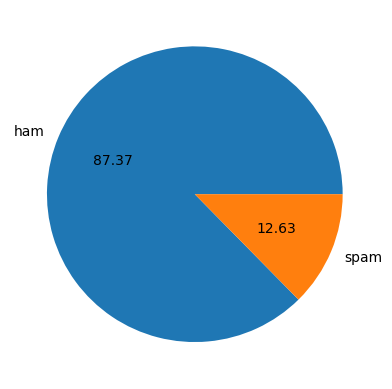

In [198]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(), labels = ['ham','spam'], autopct="%0.2f")
plt.show()

In [199]:
import nltk


In [200]:
#We are exploring the data and checking the total number of char, words and sentences in a message.
df['num_characters']= df['text'].apply(len)
df.head()

,Target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [201]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df.head()

,Target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [202]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,Target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [203]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [204]:
#Checing the same for just Ham messages
df[df['Target'] == 0] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [205]:
#Checing the same for just Spam messages
df[df['Target'] == 1] [['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [206]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

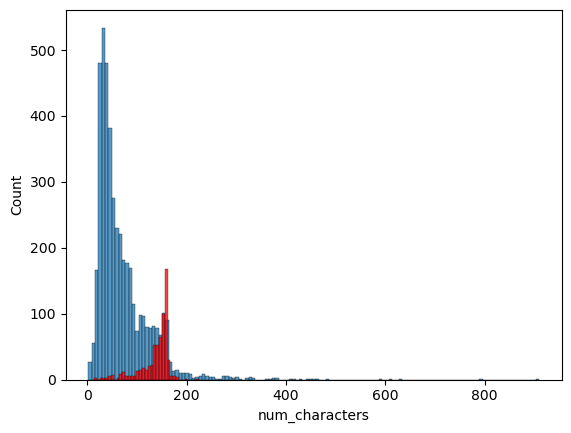

In [207]:
#Comparing the characters in all ham and spam messages.We can see the Spam messages have usually more number of characters in the message.
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

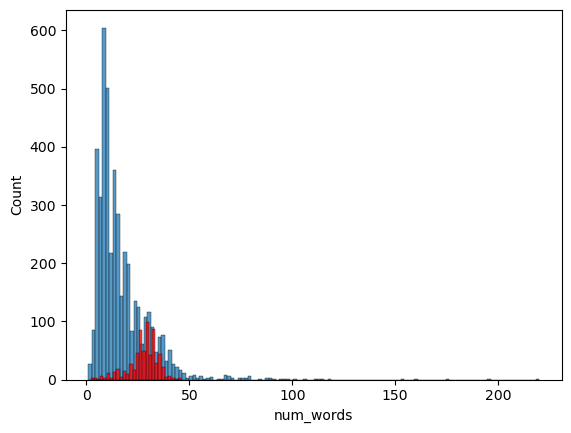

In [208]:
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'], color='red')

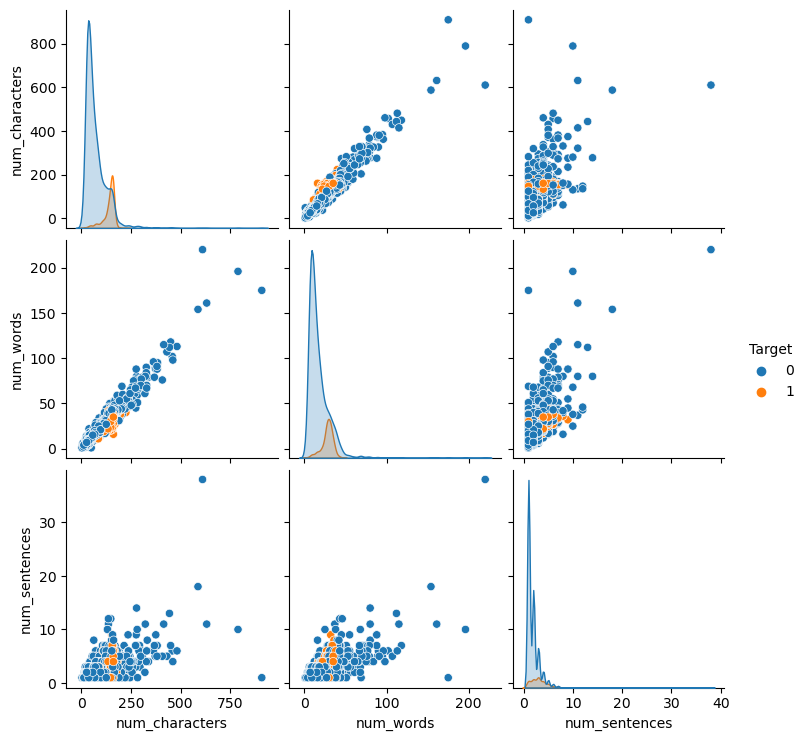

In [209]:
sns.pairplot(df, hue='Target')

C:\Users\varun\AppData\Local\Temp\ipykernel_12392\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

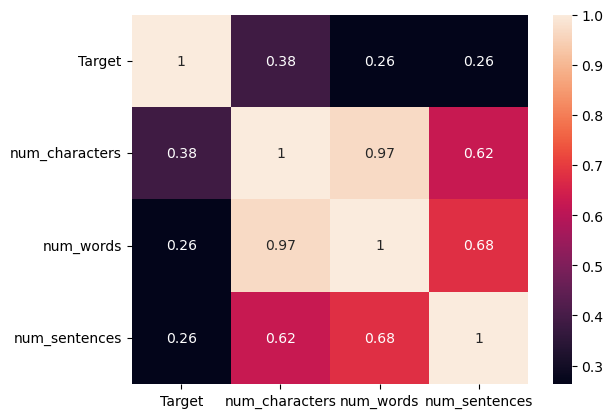

In [210]:
#Checking colinearity between all the features. the three features are strongly correlated so we will only use one during training our model.
sns.heatmap(df.corr(),annot=True)

In [211]:
#Removing stopwords, performing stemming, lower casing,removing punctuations
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
import string

stop = stopwords.words('english')

def transfor_text(text):
    
    ps = PorterStemmer()
    
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stop and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)
            

In [212]:
df['transformed_text'] = df['text'].apply(transfor_text)
df.head()

,Target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [213]:
#Getting the most common words occuring in spam messages.
spam_corpus = []
for msg in df[df['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

<Axes: xlabel='1', ylabel='0'>

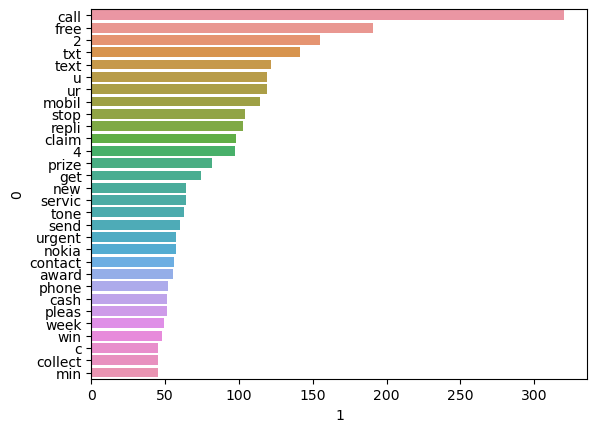

In [214]:
from collections import Counter

plot = pd.DataFrame(Counter(spam_corpus).most_common(30))

sns.barplot(data = plot, x= plot[1], y =plot[0])

<Axes: xlabel='1', ylabel='0'>

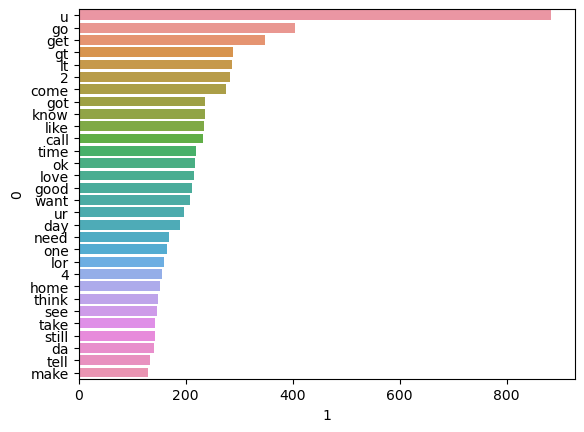

In [216]:
#Getting the most common words occuring in spam messages.
ham_corpus = []
for msg in df[df['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
plot_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

sns.barplot(data = plot_ham, x= plot_ham[1], y =plot_ham[0])

In [236]:
#Converting the text messages into vectors
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler

cv =CountVectorizer(max_features=3000)
x = cv.fit_transform(df['transformed_text']).toarray()
scaler = MinMaxScaler()#Scaling the values of vectors(did this step post model building just to see if it helps in increasing the accuracy)
x = scaler.fit_transform(x)

In [237]:
x.shape

(5169, 3000)

In [244]:
#(performed post impleneting) Adding the num_characters to text input vectors-- this helped in increasing the accuracy of the model.
x = np.hstack((x,df['num_characters'].values.reshape(-1,1)))

In [245]:
y =df['Target'].values

In [246]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [263]:
#Implementing naive bayes model(building all three and checking which one gives the best accuracy)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=2)

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

gnb.fit(x_train,y_train)
y_pred1 =  gnb.predict(x_test)

print("------------------------------------------------------")
print("               EVALUATION FOR GAUSSIAN")
print("------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test,y_pred1)) #For GuassianNaiveBayes
print("Precision:", precision_score(y_test,y_pred1))


------------------------------------------------------
               EVALUATION FOR GAUSSIAN
------------------------------------------------------
Accuracy: 0.867504835589942
Precision: 0.5021645021645021


In [264]:
mnb.fit(x_train,y_train)
y_pred2 =  mnb.predict(x_test)

print("------------------------------------------------------")
print("               EVALUATION FOR MULTINOMIAL")
print("------------------------------------------------------")
print("Accuracy", accuracy_score(y_test,y_pred2))#For MultiNomialNaiveBayes
print("Precision", precision_score(y_test,y_pred2))

------------------------------------------------------
               EVALUATION FOR MULTINOMIAL
------------------------------------------------------
Accuracy 0.9748549323017408
Precision 0.9590163934426229


In [261]:
bnb.fit(x_train,y_train)
y_pred3 =  bnb.predict(x_test)

print("------------------------------------------------------")
print("               EVALUATION FOR BINOMIAL")
print("------------------------------------------------------")
print("Accuracy:", accuracy_score(y_test,y_pred3))#For BinomialNaiveBayes(Gives the Highest Accuracy and Precision)
print("Precision Score:", precision_score(y_test,y_pred3))

------------------------------------------------------
               EVALUATION FOR BINOMIAL
------------------------------------------------------
Accuracy: 0.9835589941972921
Precision Score: 0.991869918699187
